# Motion In Polar Coordinates
George Poole grp39@cam.ac.uk

Consider a point mass $m$ fixed to the end of a spring, which is attached to the fixed origin. The spring exerts a radial force $-k(r-\ell)$, where $k$ is the spring constant and $\ell$ is the natural length. In polar coordinates $(r,\theta)$, the equations of motion are

$$m(\ddot{r}-r\dot{\theta}^2)=-k(r-\ell)$$

in the radial direction and 

$$m(r\ddot{\theta}+2\dot{r}\dot{\theta})=0$$

in the transverse direction. The latter implies that angular momentum is conserved, so we have

$$r^2\dot{\theta}=\text{constant}~~~.$$

Suppose that, initially, the point mass is held at $r=R>\ell$, $\theta=0$ and given a tranverse velocity $u$. Hence the constant is evaluated to give

$$r^2\dot{\theta}=Ru~~~,$$

which may further be subsitututed into the radial equation of motion to yield

$$\ddot{r}-\frac{R^2u^2}{r^3}=-\frac{k}{m}(r-\ell)~~~.$$

Admittedly, this looks quite difficult to solve, so let's do a numerical integration.

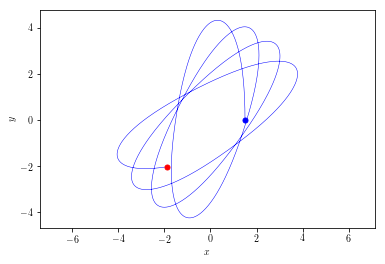

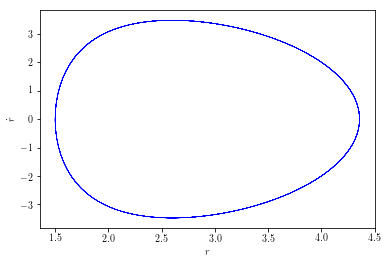

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

m=1
k=2.0
ell=1.0
R=1.5
u=5
time=20

def dxdt(x,t):
    r,dot_r,theta=x
    drdt=dot_r
    ddot_rdt=(R*u)**2/r**3-k*(r-ell)/m
    dthetadt=R*u/r**2
    return drdt, ddot_rdt, dthetadt

x_0=[R,0,0]
t=np.linspace(0,time,num=1000)
r,dot_r,theta=odeint(dxdt,x_0,t).T

x=r*np.cos(theta)
y=r*np.sin(theta)

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

plt.figure(1)
plt.plot(x,y,lw=0.5,color='b')
plt.plot(x[0],y[0],ms=5,color='b',marker='o')
plt.plot(x[-1],y[-1],ms=5,color='r',marker='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')

plt.figure(2)
plt.plot(r,dot_r,lw=0.5,color='b')
plt.xlabel('$r$')
plt.ylabel('$\dot{r}$')
plt.show()

Interestingly, these plots reveal that $r_{\text{min}}\leq r\leq r_{\text{max}}$ for all $t$. Could we have predicted this? Some insight can be obtained by writing

$$\dot{r}\frac{\text{d}\dot{r}}{\text{d}r}=\frac{\alpha}{r^3}-\beta r+\gamma$$

where $\alpha=R^2u^2$, $\beta=k/m$ and $\gamma=k\ell/m$. Integrating, we get

$$\int_0^{\dot{r}}\dot{r}'~\text{d}\dot{r}'=\int_R^r\frac{\alpha}{r'^3}-\beta r'+\gamma~\text{d}r'$$

$$\tfrac{1}{2}\dot{r}^2=-\frac{\alpha}{2r^2}-\frac{\beta r^2}{2}+\gamma r-c_R$$

where $c_R=-\tfrac{1}{2}\alpha R^{-2}-\tfrac{1}{2}\beta R^2+\gamma R$ is constant, and then

$$\dot{r}=\pm\sqrt{-\frac{\alpha}{r^2}-\beta r^2+2\gamma r-2c_R}~~~.$$

Since $\dot{r}\in\mathbb{R}$, 

$$-\frac{\alpha}{r^2}-\beta r^2+2\gamma r-2c_R\geq0$$

which provides the quartic polynomial inequality

$$-\beta r^4+2\gamma r^3-2c_Rr^2-\alpha\geq0~~~.$$

Hence $r_{\text{min}}$ and $r_{\text{max}}$ are the roots of this quartic polynomial, which can actually be solved exactly by the horrific general formula for quartics. It is easier to just solve it numerically though.

In [5]:
from sympy import Symbol, solve

alpha=(R*u)**2
beta=k/m
gamma=k*ell/m
c_R=-0.5*alpha/R**2-0.5*beta*R**2+gamma*R

x=Symbol('x')
roots=solve(-beta*x**4+2*gamma*x**3-2*c_R*x**2-alpha)
print('r_min = {} , r_max = {}'.format(roots[0],roots[1]))

r_min = 1.50000000000000 , r_max = 4.35683380933006


As might be expected, $r_{\text{min}}=R$. These values are in good agreement with the plot of $r(t)$ computed below.

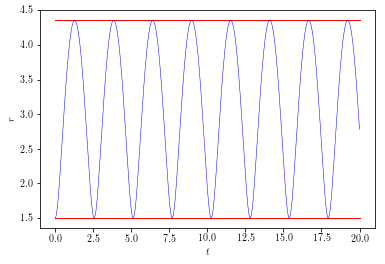

In [6]:
plt.figure(3)
a=np.array([0.0]*len(t))
plt.plot(t,a+roots[0],lw=1,color='r')
plt.plot(t,a+roots[1],lw=1,color='r')
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(t,r,lw=0.5,color='b')
plt.show()

## Related Courses

* Dynamics & Relativity, Part IA Mathematics
* Classical Dynamics, Part IB Physics B